# **Team 2 -Margins of Adaptation to Human Heat Stress: Local, National, and Global Socioeconomic Responses**

**I-GUIDE Summer School, August 7 - 11, 2023, Boulder, CO**  

Team Leader: Dr. Zhan Wang, Purdue University

Team Members:  
Elaina Gonsoroski, Florida State University  
Sukanya Dasgupta, Auburn University  
Dr. Marija Verner, Yale University  
Dr. Subhashni Raj, University of Hawai’i- Mãnoa  
Dr. Andy Zimmer, Montana State University  
Oluwadamilola Salau, The Ohio State University


# Background

Climate change impacts the food system through various channels, including the extreme temperature (heat and cold), abnormal precipitation (flood and drought), and sea-level rise. In this study, we focus on the impact of climate change on farmworkers, who are vulnerable to heat stress due to the following reasons:  

* During peak production seasons, July and August, workers are in the fields 12 hours or more, in temperatures that frequently exceed 100 degrees.

* Many workplaces do not have shaded areas for a break from the heat or provide sufficient clean drinking water.

* To protect themselves from pesticide exposure and skin cancer, farmworkers are instructed to wear long sleeves, long pants, socks, boots, hats, and neck scarves— these precautions exacerbate the problem of heat.


The research question of this study is: *How does heat stress impact farm labor locally, regionally, and globally?* This study has three major highlights:  
* We consider not only the direct impact of heat stress on labor productivity, but also the indirect effects on other inputs of agricultural production from two economic channels: substitution and scale effects.  
* With a grid-resolving economic model, we can capture the spatial hetegeneity of crop production on fine scale level, and also the spillover effects across regions due to the national crop supply-demand equilibrium.  
* We focus on not only the impact from heat stress itself, but also other consequences of climate change (decrease in crop yield, loss in water availability for irrigation).

## Methodology and Data

The approach pursued to address this problem was to utilize the SIMPLE-G Model (Simplified International Model of agricultural Prices, Land use, and the Environment - Gridded version), supplied by Dr. Wang's team at Purdue University.It is a cutting-edge instrument for assessing sustainability strategies in a global framework while taking local heterogeneity in land and water resources and natural ecosystem services into account. This multi-scale model may capture feedback from local policies to national and global scales, as well as providing boundary conditions for local decision-makers.  

We are using a variety of tools to carry out our analysis, including:

*   GEMPACK to run permutations of SIMPLE-G models that vary on different heat stressors.
*   R to plot maps and bar charts.
*   Jupyter Notebooks to document our process, workflows, and analysis.

Figure 1 provides a summary of the workflow of our project, which are described in details below.



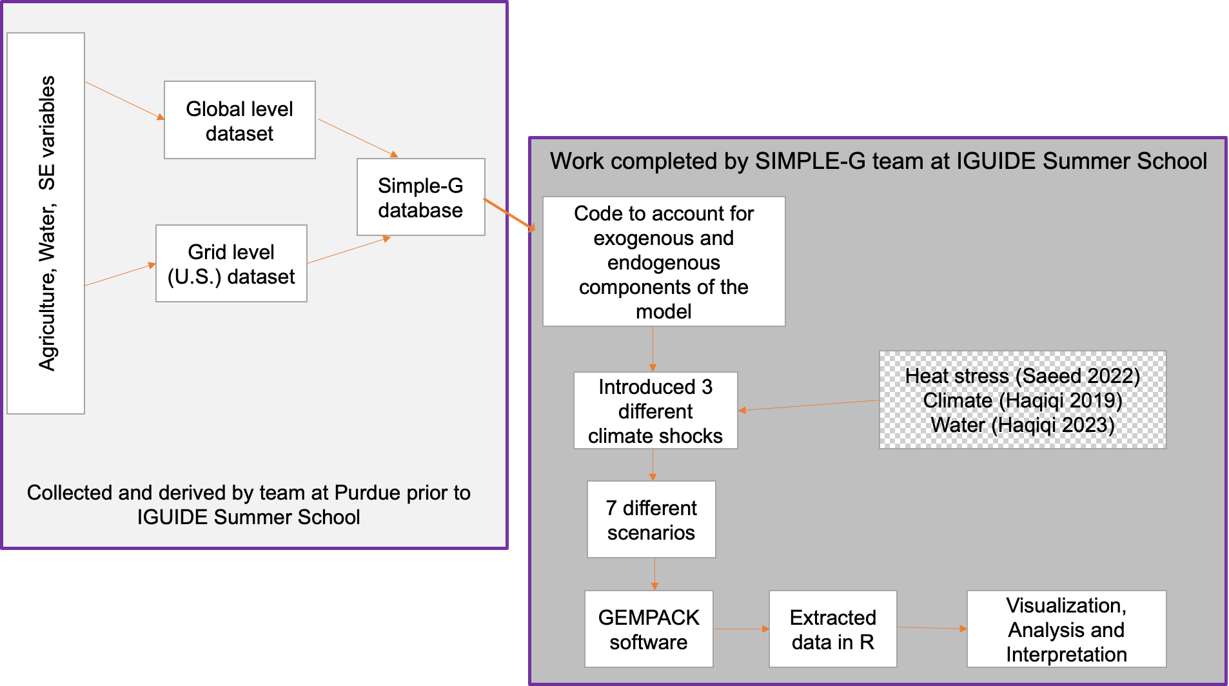

**Figure 1. Workflow of team project**  
Note: the 7 different scenarios include an experiment focusing on heat stress in California only, which we will analyze further as future steps.

## Simulation with SIMPLE-G ##

The simulation of SIMPLE-G requires the GEMPACK software, which is specially designed to run economic models. One can simulate SIMPLE-G with  a local licence of GEMPACK, or, upload the experiment file to an online version of SIMPLE-G ("SIMPLE-G Jupyter Notebook") deployed at MyGeoHub (https://mygeohub.org/tools/simplegus) to run the model with HPC located at Purdue University.   

To conduct a simulation, one needs:  
* A data file for simulation ("input/userData.har"), which contains the socio-economic projections (population, income, technology, biofuel demand) from the baseline of SIMPLE-G (2010) to 2050 (data sources of those drivers are described in the command file below). Also, the data file contains projected impacts from climate change from three dimensions:
    + Heat stress (Heat): labor productivity loss from heat stress from Saeed et al. (2022)
    + Yield impact due to climate change (Climate): the reduction of yield for rainfed farming from Haqiqi (2019)
    + Water availability for irrigation (Water): the reduction of water available for irrigation from Haqiqi et al. (2023)
* A command file (.cmf) that specifies the experiment to simulate and the data to use. In this study, we prepared six experiments for simulation:
    + input/Baseline: the experiment with socio-economic drivers only from 2010 - 2050, which represents the future baseline without impacts from climate change.
    + input/Heat：the baseline scenario + climate change's impacts on heat stress only.
    + input/ClimateHeat: the baseline scenario + climate change's impacts on heat stress and crop yield.
    + input/ClimateWater: the baseline scenario + climate change's impacts on crop yield and water availability.
    + input/HeatWater: the baseline scenario + climate change's impacts on heat stress and water availability.
    + input/All: the baseline scenario + all three impacts from climate change (heat stress, crop yield and water availabitlity)
    

Figure 2 shows the online version of SIMPLE-G on MyGeohub. One can register a free MyGeoHub account and click "Launch Tool" in order to start using SIMPLE-G online without the need of full license of GEMPACK. Still, we recommend the user to download and install a free-trial version of GEMPACK (https://www.copsmodels.com/gpeidl.htm), in order to view and edit the data file and commmand file easily.  

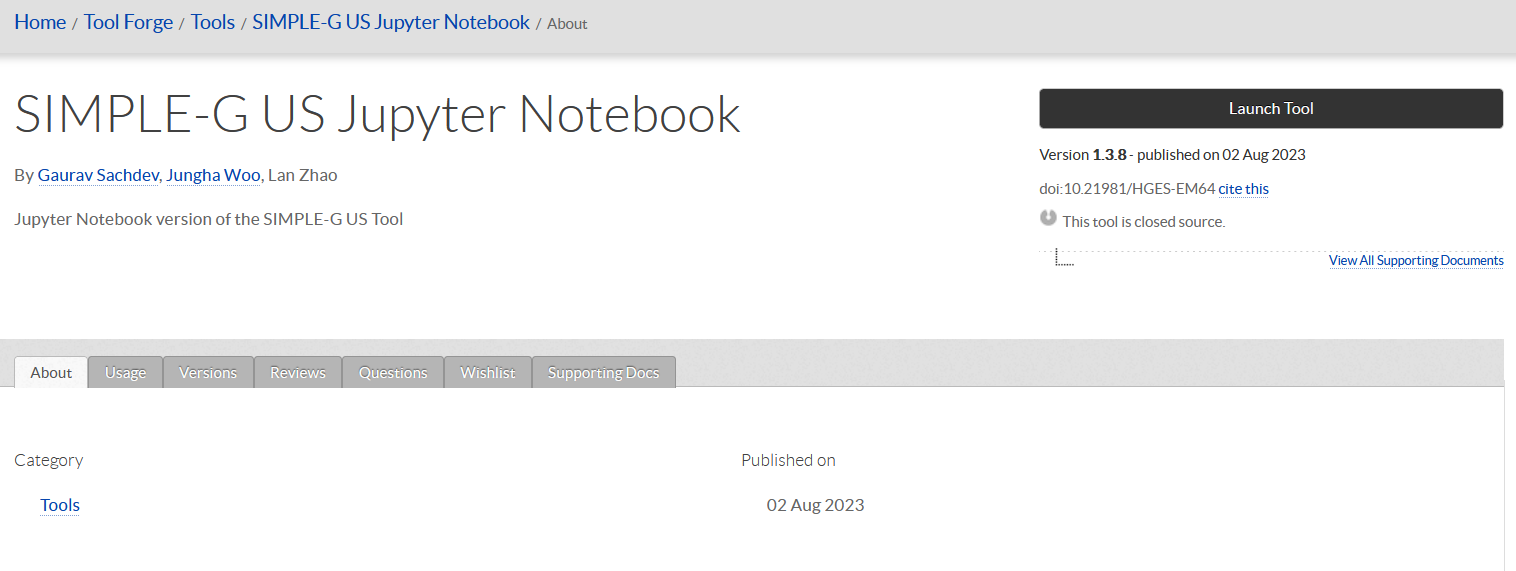

**Figure 2. Online version of SIMPLE-G on MyGeoHub**

Figure 3 shows the user's interface of the online version of SIMPLE-G, where the user can select across models and versions, upload the command file (SIMPLEG_IGS_test.cmf) and data file (userData.Har), and submit the experiment as a task. Then the HPC will automatically add the task in a queue and run the experiment (~15 - 20 minutes), and the finalized results can be downloaded from the "Manage" tab.    

The simulation results are saved under "output" folder, which we will visualize and analyze with R.

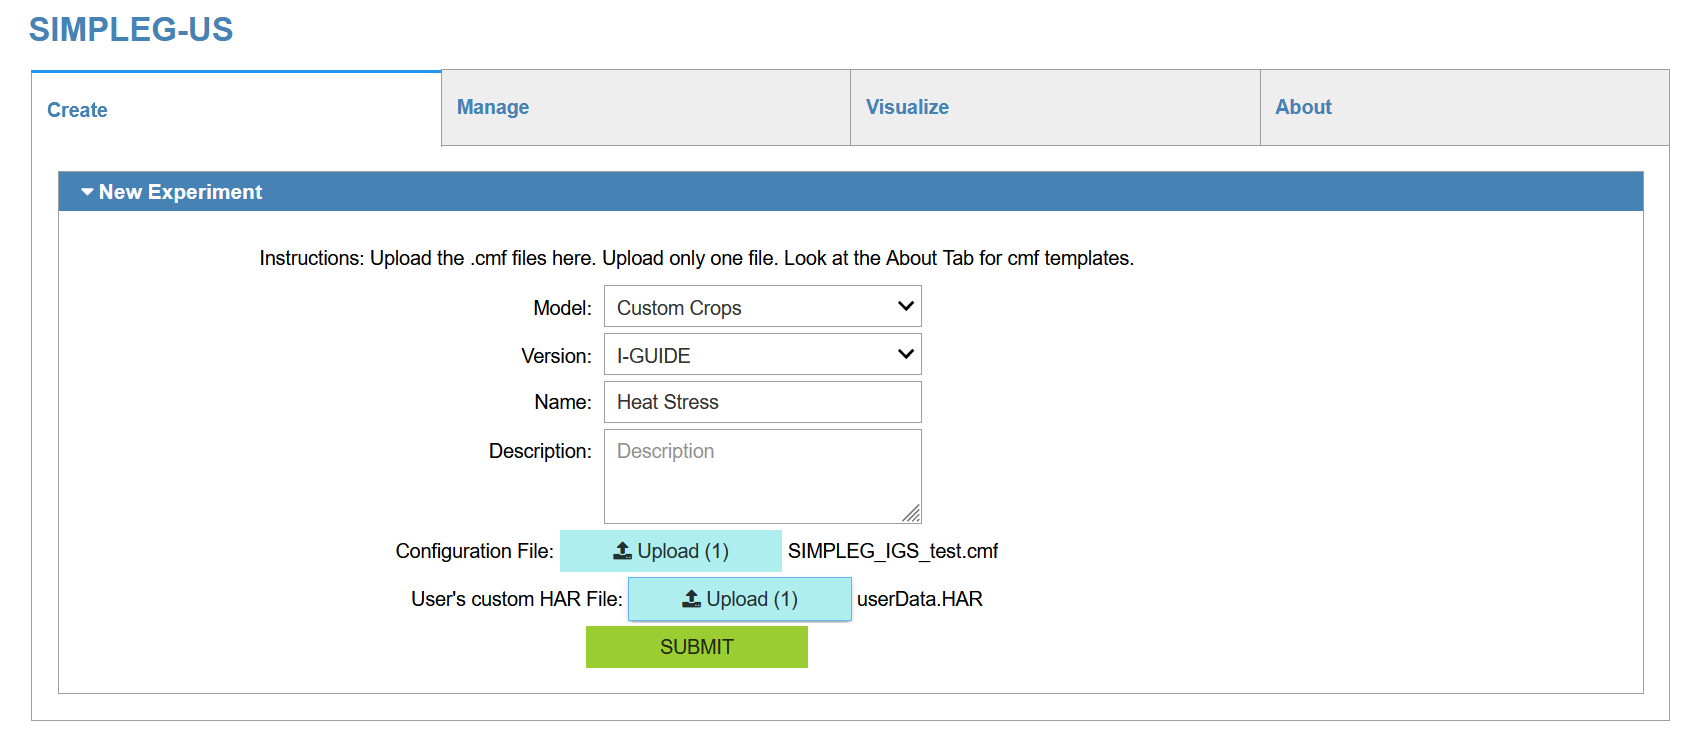

**Figure 3. Interface of SIMPLE-G Jupyter notebook**

## Results and Discussion

### Pretreatment of results

To visualize and analyze simulation results, we need to load necessary packages first.

In [ ]:
rm(list=ls())

In [92]:
install.packages("devtools")
install.packages("rlist")
install.packages("cowplot")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [93]:
library(ggplot2)
library(dplyr)
library(purrr)

library('devtools')
devtools::install_git('https://github.com/USDA-ERS/MTED-HARr.git')
require(HARr)

library(rlist)
library(cowplot)

Skipping install of 'HARr' from a xgit remote, the SHA1 (beeeb6be) has not changed since last install.
  Use `force = TRUE` to force installation



In [39]:
# read all the files in at once
#p_qcropm = result$p_aflaborg
temp <- list.files(path = "output", pattern="*.sl4", full.names = TRUE)
#read in as list. Use sapply with simplify=F to keep names of files
scenarios <- sapply(temp, read_SL4, simplify=FALSE)

# shock = read_har('input/userData.HAR')
# ALAB = shock$alab
# Base <- read_SL4('output/ExperimentBaseline.sl4')
# Heat <- read_SL4('output/ExperimentHeat.sl4')
# HW <- read_SL4('output/ExperimentHW.sl4')
# HC <- read_SL4('output/ExperimentCH.sl4')
# CW <- read_SL4('output/ExperimentCW.sl4')
# all <- read_SL4('output/ExperimentAll.sl4')


In [50]:
#rename with shorter names no path
expnames = gsub("output/","",temp)
expnames = gsub(".sl4","",expnames)
names(scenarios) <- expnames

Calculate the regional differences in the USA  
Extract variables of interest

In [51]:
per_changes <- c("p_qlabrm", "p_qlandm", "p_qcropm", "p_qnitrm")
var_interest <- lapply(scenarios, "[", per_changes)

Calculate differences

In [59]:
labor_diff <- lapply(var_interest, function(x) {x$p_qlabrm- var_interest$`ExperimentBaseline`$p_qlabrm})

labor_diff <- lapply(labor_diff, function(x) as.data.frame(x))

land_diff <- lapply(var_interest, function(x) {x$p_qlandm- var_interest$`ExperimentBaseline`$p_qlandm})

land_diff <- lapply(land_diff, function(x) as.data.frame(x))

crop_diff <- lapply(var_interest, function(x) {x$p_qcropm- var_interest$`ExperimentBaseline`$p_qcropm})

crop_diff <- lapply(crop_diff, function(x) as.data.frame(x))

nitro_diff <- lapply(var_interest, function(x) {x$p_qnitrm- var_interest$`ExperimentBaseline`$p_qnitrm})

nitro_diff <- lapply(nitro_diff, function(x) as.data.frame(x))

#list2env(labor_diff,envir=.GlobalEnv)

Labor_difference <- as.data.frame(list.cbind(labor_diff))
colnames(Labor_difference) <- c("All_labor", "Base_labor", "CH_labor", "CW_labor", "Heat_labor", "HW_labor")
Land_difference <- as.data.frame(list.cbind(land_diff))
colnames(Land_difference) <- c("All_land", "Base_land", "CH_land", "CW_land", "Heat_land", "HW_land")
Crop_difference <- as.data.frame(list.cbind(crop_diff))
colnames(Crop_difference) <- c("All_crop", "Base_crop", "CH_crop", "CW_crop", "Heat_crop", "HW_crop")
Nitro_difference <- as.data.frame(list.cbind(nitro_diff))
colnames(Nitro_difference) <- c("All_nitro", "Base_nitro", "CH_nitro", "CW_nitro", "Heat_nitro", "HW_nitro")

Reg_differences <- cbind(Labor_difference, Land_difference, Crop_difference, Nitro_difference)

Reg_differences <- Reg_differences  %>%
  select(-c("Base_labor", "Base_land", "Base_crop", "Base_nitro"))

write.csv(Reg_differences, "Regional_differences.csv")

# Isolate heat
iso_heat_labor <- data.frame(var_interest$ExperimentAll$p_qlabrm - var_interest$ExperimentCW$p_qlabrm)
colnames(iso_heat_labor) <- "iso_heat_labor"

iso_heat_land <- data.frame(var_interest$ExperimentAll$p_qlandm - var_interest$ExperimentCW$p_qlandm)
colnames(iso_heat_land) <- "iso_heat_land"

iso_heat_crop <- data.frame(var_interest$ExperimentAll$p_qcropm - var_interest$ExperimentCW$p_qcropm)
colnames(iso_heat_crop) <- "iso_heat_crop"

iso_heat_nitro <- data.frame(var_interest$ExperimentAll$p_qnitrm - var_interest$ExperimentCW$p_qnitrm)
colnames(iso_heat_nitro) <- "iso_heat_nitro"

Iso_heat_differences <- cbind(iso_heat_labor, iso_heat_land, iso_heat_crop, iso_heat_nitro)

write.csv(Iso_heat_differences, "Iso_heat_differences.csv")

Calculate the grid-level difference

In [61]:
# read in the grid-level irrigation and rainfed land (from 2010 baseline)
preLand <- read.csv("PreLand.csv")
preLabor <- read.csv("Prelabor.csv")
preNitro <- read.csv("Prenitrol.csv")
preCrop <- read.csv("Precrop.csv")

In [67]:
# Set each experiment/scenario as a dataframe
ExperimentHeat <- lapply(scenarios$ExperimentHeat, function(x) as.data.frame(x))
ExperimentBaseline <- lapply(scenarios$ExperimentBaseline, function(x) as.data.frame(x))
ExperimentAll <- lapply(scenarios$ExperimentAll, function(x) as.data.frame(x))
ExperimentCW <- lapply(scenarios$ExperimentCW, function(x) as.data.frame(x))

In [68]:
# Write function to manually calculate the % change in the different land type
pct_change <- function(data, change) {
  post <- data$X1.Irrigated*(1+(change$irrigated.TOTAL/100)) + data$X2.Rainfed*(1+(change$rainfed.TOTAL/100))
  pre <- data$X1.Irrigated + data$X2.Rainfed
  pct <- (post -pre)/pre*100
  return(pct[1:75651])
}

# Write a function to quickly run each experiment/scenario
scenario_change <- function(simulation){
  labor_change <- pct_change(preLabor, simulation$p_qlaborgl)
  crop_change <- pct_change(preCrop, simulation$p_qcropgl)
  land_change <- pct_change(preLand, simulation$p_qlandgl)
  nitro_change <- pct_change(preNitro, simulation$p_qnitrogl)
  pctout <- data.frame(id=1:75651)
  pctout$land <- land_change
  pctout$labor <- labor_change
  pctout$crop <- crop_change
  pctout$nitro <- nitro_change
  return(pctout)
}

# Write out each data frame
All_pct <- scenario_change(ExperimentAll)
Heat_pct <- scenario_change(ExperimentHeat)
Baseline_pct <- scenario_change(ExperimentBaseline)
CW_pct <- scenario_change(ExperimentCW)

write.csv(All_pct, "All_pct_change.csv")
write.csv(Heat_pct, "Heat_pct_change.csv")
write.csv(Baseline_pct, "Baseline_pct_change.csv")
write.csv(CW_pct, "CW_pct_change.csv")

### Subregional results

First of all, we visualize the results by sub-regional level, on the difference between baseline scenario (socio-economic drivers only) and several climate change scenarios. 

In [124]:
data <- read.csv("Regional_differences.csv", header = T)
data = data[1:9,]

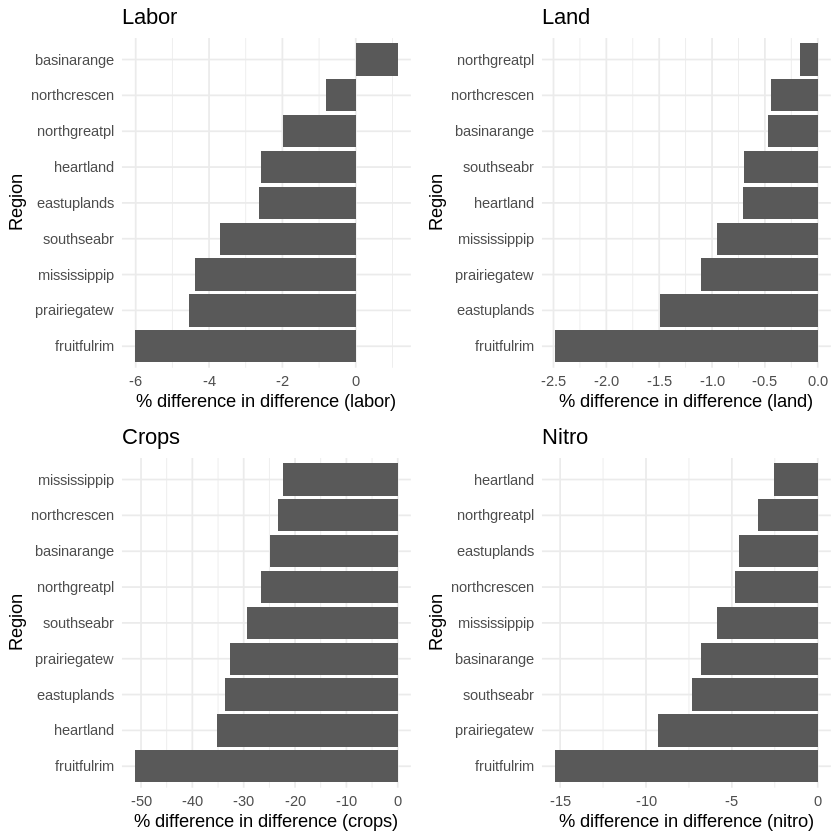

In [125]:
## % Differences in Baseline vs. Climate, Heat, and Water Shocks Model
# 1
bar_chart1 <- ggplot(data, aes(x = reorder(X, All_labor), y = All_labor)) +
  geom_bar(stat = "identity", position = "dodge") +
  coord_flip() +
  labs(title = "Labor",
       x = "Region",
       y = "% difference in difference (labor)") +
  theme_minimal() +
  guides(fill = guide_legend(title = "Difference in Differences")) +
  theme(legend.position = "none")

#bar_chart1

# 2

bar_chart2 <- ggplot(data, aes(x = reorder(X, All_land), y = All_land)) +
  geom_bar(stat = "identity", position = "dodge") +
  coord_flip() +
  labs(title = "Land",
       x = "Region",
       y = "% difference in difference (land)") +
  theme_minimal() +
  guides(fill = guide_legend(title = "Difference in Differences")) +
  theme(legend.position = "none")

#bar_chart2

# 3

bar_chart3 <- ggplot(data, aes(x = reorder(X, All_crop), y = All_crop)) +
  geom_bar(stat = "identity", position = "dodge") +
  coord_flip() +
  labs(title = "Crops",
       x = "Region",
       y = "% difference in difference (crops)") +
  theme_minimal() +
  guides(fill = guide_legend(title = "Difference in Differences")) +
  theme(legend.position = "none")

#bar_chart3

# 4

bar_chart4 <- ggplot(data, aes(x = reorder(X, All_nitro), y = All_nitro)) +
  geom_bar(stat = "identity", position = "dodge") +
  coord_flip() +
  labs(title = "Nitro",
       x = "Region",
       y = "% difference in difference (nitro)") +
  theme_minimal() +
  guides(fill = guide_legend(title = "Difference in Differences")) +
  theme(legend.position = "none")

#bar_chart4
  
# all
                   
combined_plot <- plot_grid(bar_chart1, bar_chart2, bar_chart3, bar_chart4, ncol=2) 
# combined_plot + ggtitle("% Differences in Baseline vs. Climate, Water, and Heat Shocks Model")
combined_plot
ggsave(filename = "all_stressors.png", plot = combined_plot, width = 11, height = 11, dpi = 300, bg = "white") 


**Figure 4. Sub-regional responses in crop output and inputs use, for all three climate change impacts**

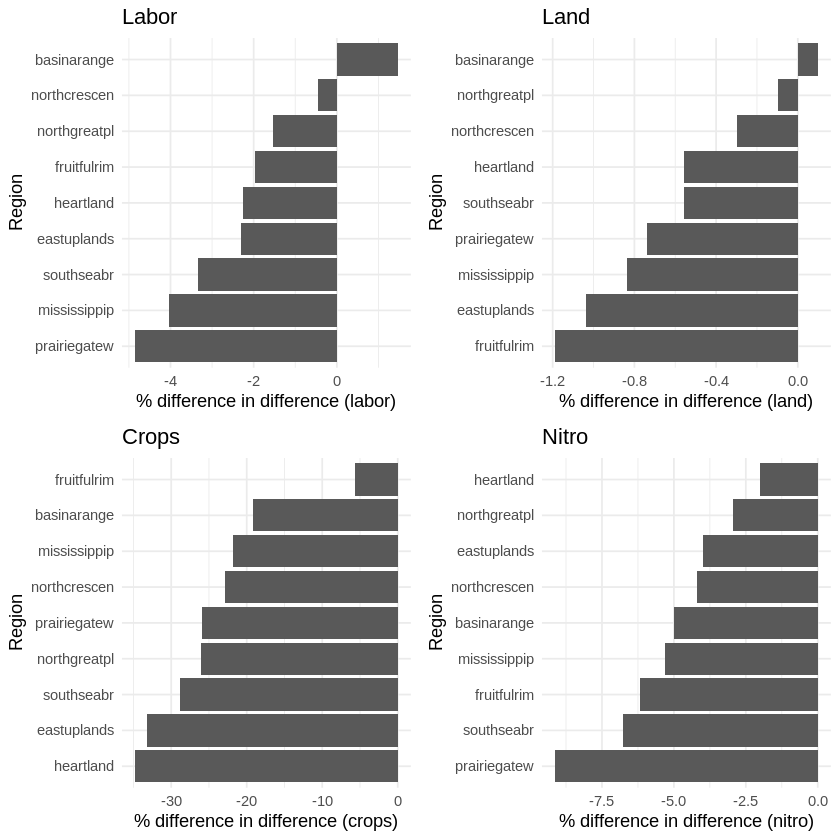

In [126]:
## Climate + Heat
# 5
bar_chart5 <- ggplot(data, aes(x = reorder(X, CH_labor), y = CH_labor)) +
  geom_bar(stat = "identity", position = "dodge") +
  coord_flip() +
  labs(title = "Labor",
       x = "Region",
       y = "% difference in difference (labor)") +
  theme_minimal() +
  guides(fill = guide_legend(title = "Difference in Differences")) +
  theme(legend.position = "none")

#bar_chart5

# 6

bar_chart6 <- ggplot(data, aes(x = reorder(X, CH_land), y = CH_land)) +
  geom_bar(stat = "identity", position = "dodge") +
  coord_flip() +
  labs(title = "Land",
       x = "Region",
       y = "% difference in difference (land)") +
  theme_minimal() +
  scale_fill_manual(values = c("Positive" = "#FC8D62", "Negative" = "#5E3C99")) +
  geom_bar(stat = "identity", position = "dodge") +
  theme(legend.position = "none")

#bar_chart6

# 7

bar_chart7 <- ggplot(data, aes(x = reorder(X, CH_crop), y = CH_crop)) +
  geom_bar(stat = "identity", position = "dodge") +
  coord_flip() +
  labs(title = "Crops",
       x = "Region",
       y = "% difference in difference (crops)") +
  theme_minimal() +
  scale_fill_manual(values = c("Positive" = "#FC8D62", "Negative" = "#5E3C99")) +
  geom_bar(stat = "identity", position = "dodge") +
  theme(legend.position = "none")

#bar_chart7

# 8

bar_chart8 <- ggplot(data, aes(x = reorder(X, CH_nitro), y = CH_nitro)) +
  geom_bar(stat = "identity", position = "dodge") +
  coord_flip() +
  labs(title = "Nitro",
       x = "Region",
       y = "% difference in difference (nitro)") +
  theme_minimal() +
  scale_fill_manual(values = c("Positive" = "#FC8D62", "Negative" = "#5E3C99")) +
  geom_bar(stat = "identity", position = "dodge") +
  theme(legend.position = "none")

#bar_chart8

# all
combined_plot <- plot_grid(bar_chart5, bar_chart6, bar_chart7, bar_chart8, ncol=2) 
# combined_plot + ggtitle("% Differences in Baseline vs. Climate and Heat Shocks Model")
combined_plot
ggsave(filename = "climate_heat.png", plot = combined_plot, width = 11, height = 11, dpi = 300, bg = "white")



**Figure 5. Sub-regional responses in crop output and inputs use, for eat stress and yield impacts**

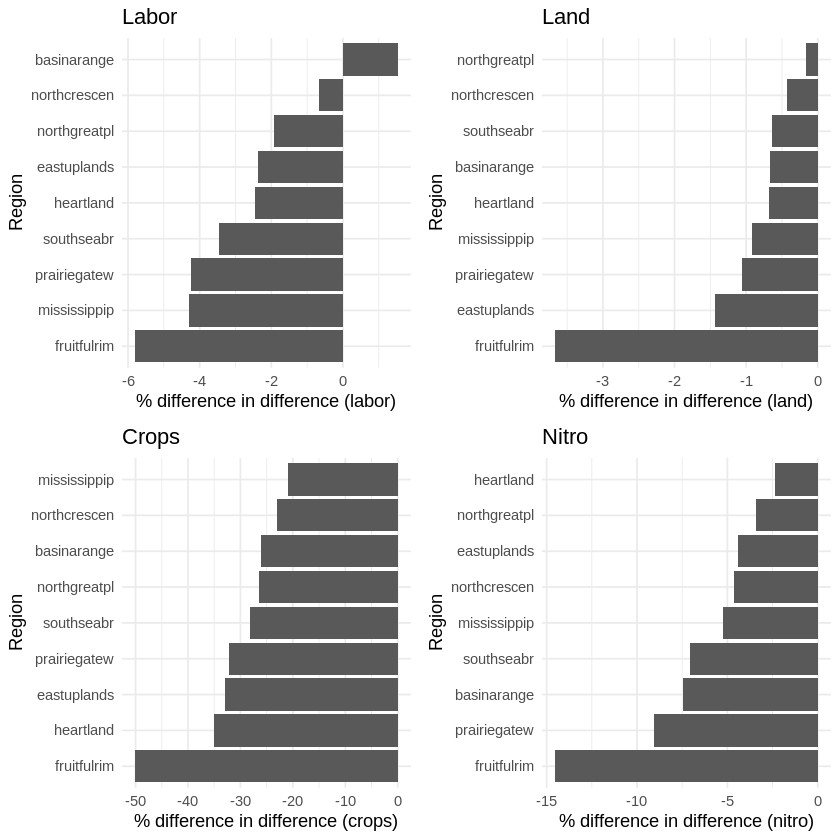

In [127]:
## Climate + Water

# 9

bar_chart9 <- ggplot(data, aes(x = reorder(X, CW_labor), y = CW_labor)) +
  geom_bar(stat = "identity", position = "dodge") +
  coord_flip() +
  labs(title = "Labor",
       x = "Region",
       y = "% difference in difference (labor)") +
  theme_minimal() +
  scale_fill_manual(values = c("Positive" = "#FC8D62", "Negative" = "#5E3C99")) +
  theme(legend.position = "none")

#bar_chart9

# 10

bar_chart10 <- ggplot(data, aes(x = reorder(X, CW_land), y = CW_land)) +
  geom_bar(stat = "identity", position = "dodge") +
  coord_flip() +
  labs(title = "Land",
       x = "Region",
       y = "% difference in difference (land)") +
  theme_minimal() +
  scale_fill_manual(values = c("Positive" = "#FC8D62", "Negative" = "#5E3C99")) +
  theme(legend.position = "none")

#bar_chart10

# 11

bar_chart11 <- ggplot(data, aes(x = reorder(X, CW_crop), y = CW_crop)) +
  geom_bar(stat = "identity", position = "dodge") +
  coord_flip() +
  labs(title = "Crops",
       x = "Region",
       y = "% difference in difference (crops)") +
  theme_minimal() +
  scale_fill_manual(values = c("Positive" = "#FC8D62", "Negative" = "#5E3C99")) +
  theme(legend.position = "none")

#bar_chart11

# 12

bar_chart12 <- ggplot(data, aes(x = reorder(X, CW_nitro), y = CW_nitro)) +
  geom_bar(stat = "identity", position = "dodge") +
  coord_flip() +
  labs(title = "Nitro",
       x = "Region",
       y = "% difference in difference (nitro)") +
  theme_minimal() +
  scale_fill_manual(values = c("Positive" = "#FC8D62", "Negative" = "#5E3C99")) +
  theme(legend.position = "none")

#bar_chart12

# all

combined_plot <-plot_grid(bar_chart9, bar_chart10, bar_chart11, bar_chart12, ncol=2)
# combined_plot + ggtitle("% Differences in Baseline vs. Climate and Water Shocks Model")
combined_plot
ggsave(filename = "climate_water.png", plot = combined_plot, width = 11, height = 11, dpi = 300, bg = "white")


**Figure 6. Sub-regional responses in crop output and inputs use, for yield and water impacts**

In [129]:
## Heat isolated
data <- read.csv("Iso_heat_differences.csv", header = T)
data = data[1:9,]

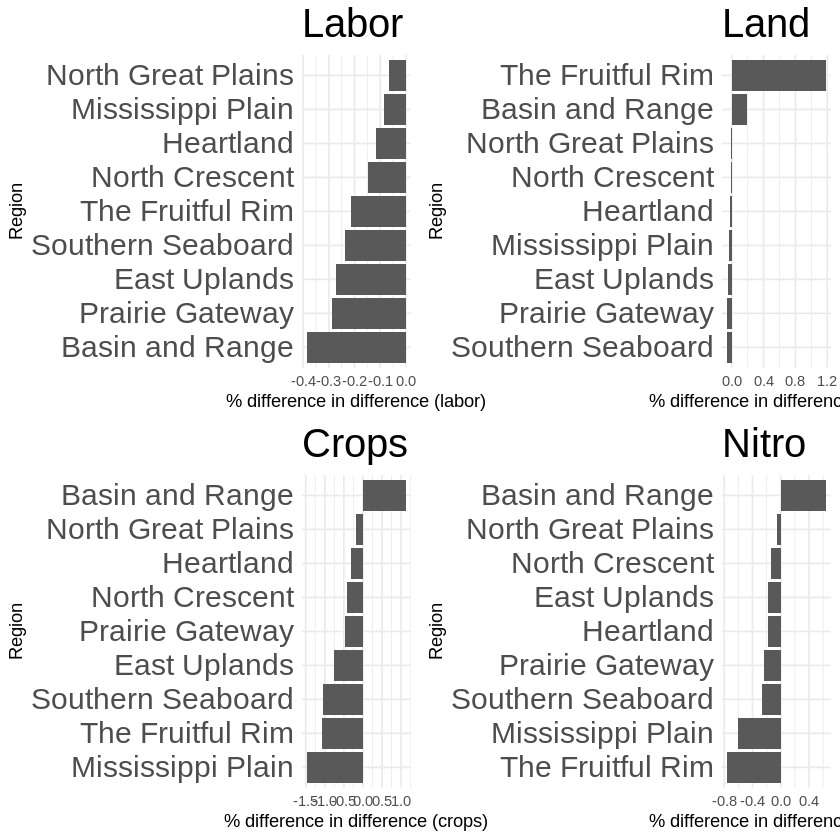

In [130]:
# 13
bar_chart13 <- ggplot(data, aes(x = reorder(X, iso_heat_labor), y = iso_heat_labor)) +
  geom_bar(stat = "identity", position = "dodge") +
  coord_flip() +
  labs(title = "Labor",
       x = "Region",
       y = "% difference in difference (labor)") +
  theme_minimal() +
  scale_fill_manual(values = c("Positive" = "#FC8D62", "Negative" = "#5E3C99")) +
  geom_bar(stat = "identity", position = "dodge") +
  theme(legend.position = "none",
        axis.text.y = element_text(size = 18),
        plot.title = element_text(size = 24)) +
        scale_x_discrete(labels = c("heartland" = "Heartland", "northcrescen" = "North Crescent", "northgreatpl" = "North Great Plains", "prairiegatew" = "Prairie Gateway", "eastuplands" = "East Uplands", "southseabr" = "Southern Seaboard", "fruitfulrim" = " The Fruitful Rim", "basinarange" = "Basin and Range", "mississippip" = "Mississippi Plain"))

#bar_chart13

ggsave(filename = "iso_heat_labor.png", plot = bar_chart13, width = 11, height = 11, dpi = 300, bg = "white")

# 14

bar_chart14 <- ggplot(data, aes(x = reorder(X, iso_heat_land), y = iso_heat_land)) +
  geom_bar(stat = "identity", position = "dodge") +
  coord_flip() +
  labs(title = "Land",
       x = "Region",
       y = "% difference in difference (land)") +
  theme_minimal() +
  scale_fill_manual(values = c("Positive" = "#FC8D62", "Negative" = "#5E3C99")) +
  theme(legend.position = "none",
        axis.text.y = element_text(size = 18),
        plot.title = element_text(size = 24)) +
        scale_x_discrete(labels = c("heartland" = "Heartland", "northcrescen" = "North Crescent", "northgreatpl" = "North Great Plains", "prairiegatew" = "Prairie Gateway", "eastuplands" = "East Uplands", "southseabr" = "Southern Seaboard", "fruitfulrim" = " The Fruitful Rim", "basinarange" = "Basin and Range", "mississippip" = "Mississippi Plain"))

#bar_chart14

ggsave(filename = "iso_heat_land.png", plot = bar_chart14, width = 11, height = 11, dpi = 300, bg = "white")

# 15

bar_chart15 <- ggplot(data, aes(x = reorder(X, iso_heat_crop), y = iso_heat_crop)) +
  geom_bar(stat = "identity", position = "dodge") +
  coord_flip() +
  labs(title = "Crops",
       x = "Region",
       y = "% difference in difference (crops)") +
  theme_minimal() +
  scale_fill_manual(values = c("Positive" = "#FC8D62", "Negative" = "#5E3C99")) +
  theme(legend.position = "none",
        axis.text.y = element_text(size = 18),
        plot.title = element_text(size = 24)) +
        scale_x_discrete(labels = c("heartland" = "Heartland", "northcrescen" = "North Crescent", "northgreatpl" = "North Great Plains", "prairiegatew" = "Prairie Gateway", "eastuplands" = "East Uplands", "southseabr" = "Southern Seaboard", "fruitfulrim" = " The Fruitful Rim", "basinarange" = "Basin and Range", "mississippip" = "Mississippi Plain"))  

#bar_chart15

ggsave(filename = "iso_heat_crop.png", plot = bar_chart15, width = 11, height = 11, dpi = 300, bg = "white")

# 16

bar_chart16 <- ggplot(data, aes(x = reorder(X, iso_heat_nitro), y = iso_heat_nitro)) +
  geom_bar(stat = "identity", position = "dodge") +
  coord_flip() +
  labs(title = "Nitro",
       x = "Region",
       y = "% difference in difference (nitro)") +
  theme_minimal() +
  scale_fill_manual(values = c("Positive" = "#FC8D62", "Negative" = "#5E3C99")) +
  theme(legend.position = "none",
        axis.text.y = element_text(size = 18),
        plot.title = element_text(size = 24)) +
        scale_x_discrete(labels = c("heartland" = "Heartland", "northcrescen" = "North Crescent", "northgreatpl" = "North Great Plains", "prairiegatew" = "Prairie Gateway", "eastuplands" = "East Uplands", "southseabr" = "Southern Seaboard", "fruitfulrim" = " The Fruitful Rim", "basinarange" = "Basin and Range", "mississippip" = "Mississippi Plain"))

#bar_chart16

ggsave(filename = "iso_heat_nitro.png", plot = bar_chart16, width = 11, height = 11, dpi = 300, bg = "white")

# all

combined_plot <- plot_grid(bar_chart13, bar_chart14, bar_chart15, bar_chart16, ncol=2) 
combined_plot

ggsave(filename = "heat.png", plot = combined_plot, width = 11, height = 11, dpi = 300, bg = "white")



**Figure 7. Sub-regional responses in crop output and inputs use, for heat stress impacts only**

From figure 7, we find that the Basin and Range region suffers the most from labor productivity loss when we only consider the climate change's impact on heat stress. As a result, we find farmers in the Basin and Range region would use more of non-labor inputs (nitrogen and land) to replace labor, which indicates the substitution effect.  

Furthermore, we find the Basin and Range region has a positive reponse in crop production. At the first glance, it seems to be contradictory with the impact on labor productivity. Actually, the reason of this finding indicates the importance of taking spillover effects into consideration. When the major agricultural regions (for example California in figure 8 below) suffer from heat stress and cause crop production to decrease, it also leads to the increase of crop demand from other regions, in order to satisfy the national demand of crop. Also, because the Basin and Range region has limited crop output in the baseline, the spillover effect will fully offset the reduction in crop due to climate change, and results in net increase in crop output.  

Finally, when we also include other dimensions of climate change (yield and water), they further influnece the national pattern of crop production and inputs use, as are shown in figures 4 - 6.

### Grid level results

Code for visualize results at grid level from a public GitHub repository: https://github.com/ZimmerMaps/iguide_simple-g

In [97]:
install.packages("rnaturalearthdata")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [121]:
system("apt-get -y update")
system("apt-get install -y libudunits2-dev libgdal-dev libgeos-dev libproj-dev")


install.packages("sf")

library("sf")
library("tidyverse")
library("rnaturalearth")
library("stars")
library("raster")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [95]:
# LOAD SHOCK and MAPPING DATA ####
shock = read_har('input/userData.HAR')
mapping_data <- st_read('content/mapping_State.shp')

# GRID LEVEL INPUT DATA ####

# relative yield climate change
rycc_shocks <- as.data.frame(shock$rycc)
colnames(rycc_shocks) <- c("rycc_shock")
rycc_shocks<- rownames_to_column(rycc_shocks, 'No')
rycc_shocks$No <- as.factor(rycc_shocks$No)

# water - GSP2
wat2_shocks <- as.data.frame(shock$wat2)
colnames(wat2_shocks) <- c("wat2_shock")
wat2_shocks<- rownames_to_column(wat2_shocks, 'No')
wat2_shocks$No <- as.factor(wat2_shocks$No)

# water - GSP3
wat3_shocks <- as.data.frame(shock$wat3)
colnames(wat3_shocks) <- c("wat3_shock")
wat3_shocks<- rownames_to_column(wat3_shocks, 'No')
wat3_shocks$No <- as.factor(wat3_shocks$No)

# water - GSP4
wat4_shocks <- as.data.frame(shock$wat4)
colnames(wat4_shocks) <- c("wat4_shock")
wat4_shocks<- rownames_to_column(wat4_shocks, 'No')
wat4_shocks$No <- as.factor(wat4_shocks$No)

# labloss heat
heat_shocks <- as.data.frame(shock$alab)
colnames(heat_shocks) <- c("heat_irrigated", "heat_rainfed")
heat_shocks<- rownames_to_column(heat_shocks, 'delete')
heat_shocks<- rownames_to_column(heat_shocks, 'No')
heat_shocks<- dplyr::select(heat_shocks, No, heat_irrigated, heat_rainfed)
heat_shocks$No <- as.factor(heat_shocks$No)

# merge together as gridded data data
gridded_data <- left_join(rycc_shocks, wat2_shocks, 
                           by='No') %>%
  left_join(., wat3_shocks, by='No') %>%
  left_join(., wat4_shocks, by='No') %>%
  left_join(., heat_shocks, by='No')


gridded_data$No <- as.factor(gridded_data$No)
mapping_data$No <- as.factor(mapping_data$No)


# MERGE GRIDDED INPUT DATA ####

merged_mapping_data <- left_join(mapping_data, gridded_data, 
                           by='No')


Reading layer `mapping_State' from data source 
  `/home/jovyan/Team2/content/mapping_State.shp' using driver `ESRI Shapefile'
Simple feature collection with 75651 features and 9 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -124.4583 ymin: 25.375 xmax: -67.04167 ymax: 49.29167
Geodetic CRS:  WGS 84


In [98]:
# PLOT GRIDDED DATA - EXPORT RASTER AND PLOT

world_shp <- ne_countries(scale = "medium", returnclass = "sf")
us_states_shp <- ne_states(returnclass = "sf", country = "United States of America")

#remove hawaii and alaska for plotting
us_states_shp <- us_states_shp[us_states_shp$abbrev != "Hawaii", ] 
us_states_shp <- us_states_shp[us_states_shp$abbrev != "Alaska", ] 

The rnaturalearthhires package needs to be installed.

Installing the rnaturalearthhires package.





── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpZYQy3X/remotes2285b60b2d2/ropensci-rnaturalearthhires-c3785a8/DESCRIPTION’ ... OK
* preparing ‘rnaturalearthhires’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘rnaturalearthhires_0.2.1.tar.gz’



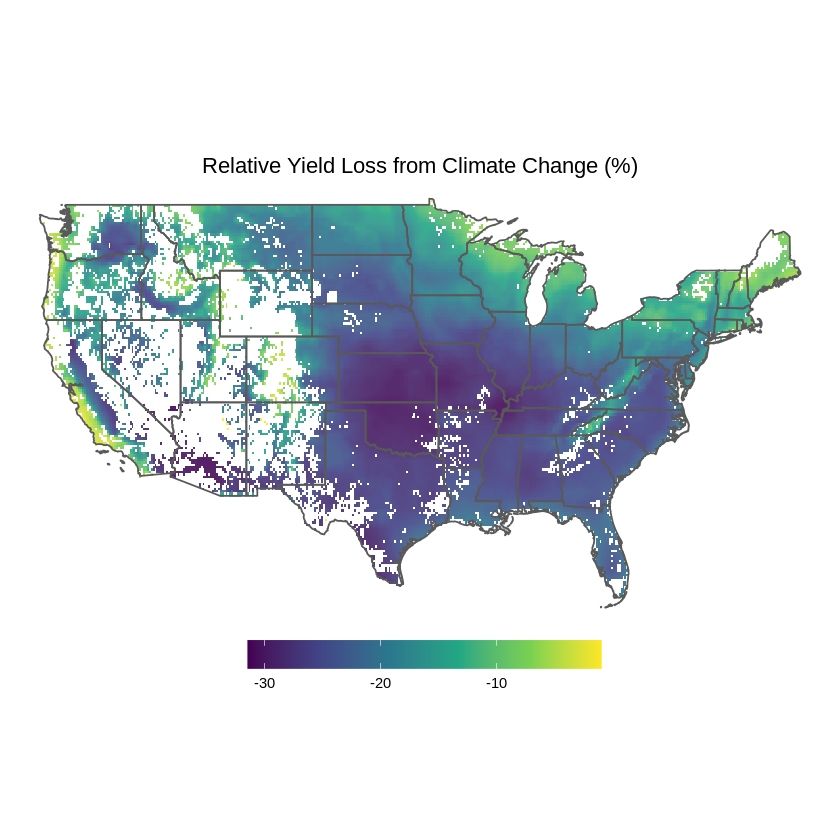

In [107]:
# Example of shock - Heat stress
merged_mapping_data_rycc <-st_rasterize(merged_mapping_data %>% dplyr::select(rycc_shock, geometry))
write_stars(merged_mapping_data_rycc, "rycc_shock.tiff")

merged_mapping_data_rycc_data <- raster("rycc_shock.tiff")
merged_mapping_data_rycc_data_df <- as.data.frame(merged_mapping_data_rycc_data, xy = TRUE)

rycc_plot <- ggplot() +
  geom_tile(data = merged_mapping_data_rycc_data_df, aes(x, y, fill = rycc_shock), alpha = 0.9) +
  geom_sf(data = us_states_shp, linewidth = 0.5, fill = NA) +
  theme_void() +
  scale_x_continuous(limits = c(-124.848974, -66.885444)) +
  scale_y_continuous(limits = c(24.396308, 49.384358)) +
  theme(legend.position = "bottom") +
  labs(title = "Relative Yield Loss from Climate Change (%)", fill = "") +
  scale_fill_viridis_c(na.value = NA) +
  theme(legend.position = "bottom",
        legend.key.width = unit(1.5, "cm"),
        plot.title = element_text(hjust = 0.5))
rycc_plot

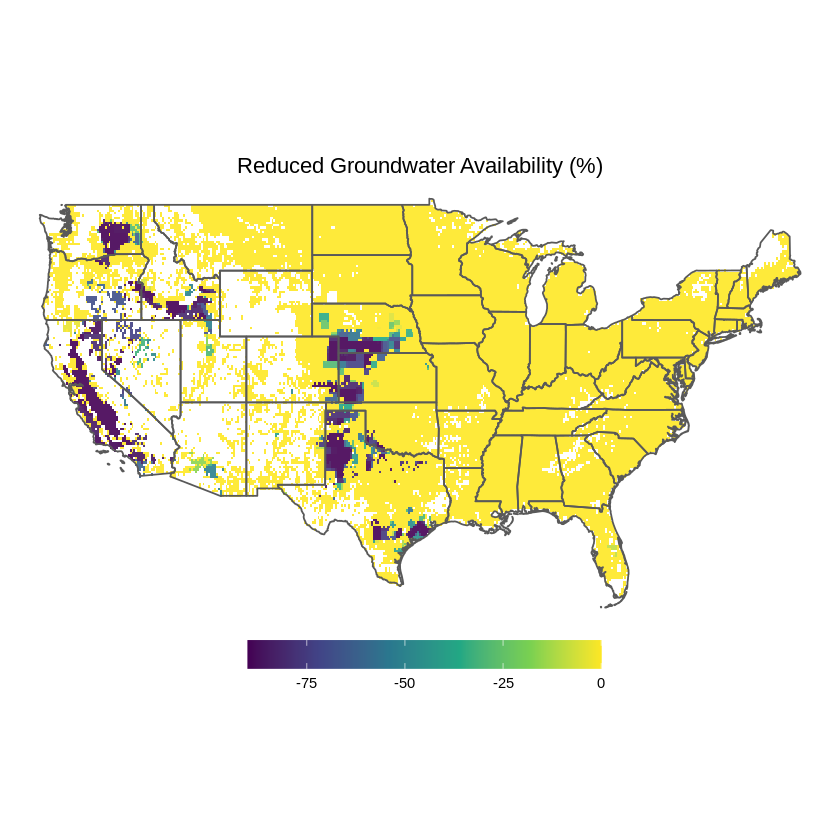

In [108]:
# WAT4
merged_mapping_data_wat4 <-st_rasterize(merged_mapping_data %>% dplyr::select(wat4_shock, geometry))
write_stars(merged_mapping_data_wat4, "wat4_shock.tiff")

merged_mapping_data_wat4 <- raster("wat4_shock.tiff")
merged_mapping_data_wat4_df <- as.data.frame(merged_mapping_data_wat4, xy = TRUE)

wat4_plot <- ggplot() +
  geom_tile(data = merged_mapping_data_wat4_df, aes(x, y, fill = wat4_shock), alpha = 0.9) +
  geom_sf(data = us_states_shp, linewidth = 0.5, fill = NA) +
  theme_void() +
  scale_x_continuous(limits = c(-124.848974, -66.885444)) +
  scale_y_continuous(limits = c(24.396308, 49.384358)) +
  theme(legend.position = "bottom") +
  labs(title = "Reduced Groundwater Availability (%)", fill = "") +
  scale_fill_viridis_c(na.value = NA) +
  theme(legend.position = "bottom",
        legend.key.width = unit(1.5, "cm"),
        plot.title = element_text(hjust = 0.5))
wat4_plot

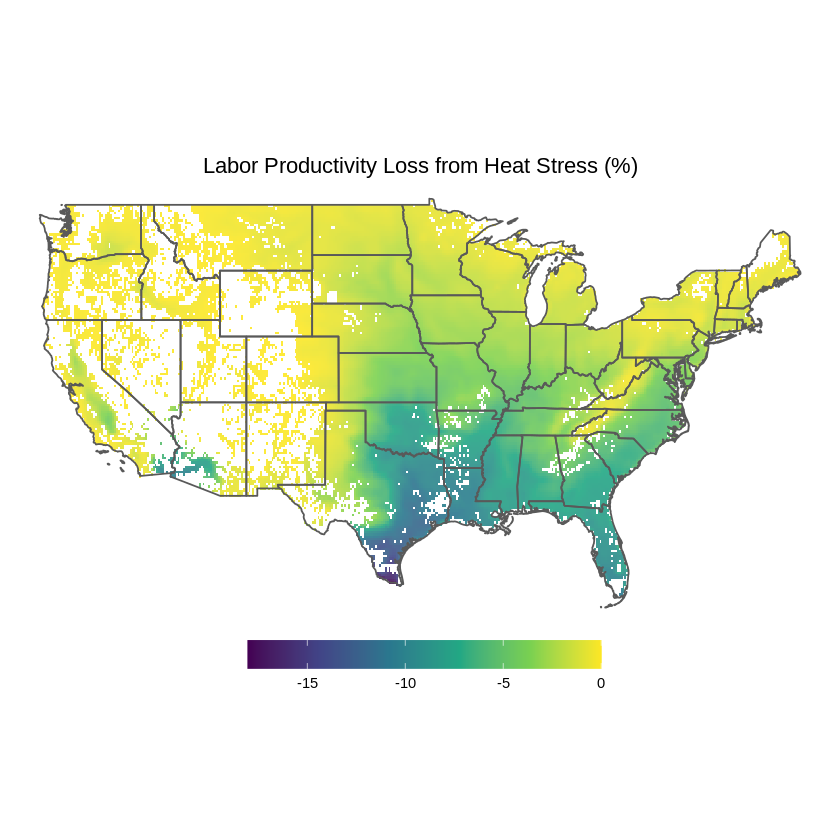

In [110]:
# HEAT IRRIGATED
merged_mapping_data_heat_ir <-st_rasterize(merged_mapping_data %>% dplyr::select(heat_irrigated, geometry))
write_stars(merged_mapping_data_heat_ir, "heat_irrigated.tiff")

merged_mapping_data_heat_ir <- raster("heat_irrigated.tiff")
merged_mapping_data_heat_ir_df <- as.data.frame(merged_mapping_data_heat_ir, xy = TRUE)

heat_irrigated_plot <- ggplot() +
  geom_tile(data = merged_mapping_data_heat_ir_df, aes(x, y, fill = heat_irrigated), alpha = 0.9) +
  geom_sf(data = us_states_shp, linewidth = 0.5, fill = NA) +
  theme_void() +
  scale_x_continuous(limits = c(-124.848974, -66.885444)) +
  scale_y_continuous(limits = c(24.396308, 49.384358)) +
  theme(legend.position = "bottom") +
  labs(title = "Labor Productivity Loss from Heat Stress (%)", fill = "") +
  scale_fill_viridis_c(na.value = NA) +
  theme(legend.position = "bottom",
        legend.key.width = unit(1.5, "cm"),
        plot.title = element_text(hjust = 0.5))
heat_irrigated_plot

**Figure 8. Impacts of climate change at grid level (top: yield; middle: water; bottom: heat stress)**

Figure 8 visualizes the three dimensions of three climate change's impact, which indicate that regions in the south US would suffer the most from climate change.

In [113]:
# LOADING CWH OUTPUT DATA ####
# experiment all - LABOR
experiment_all <- read.csv("All_pct_change.csv")
experiment_all<- rownames_to_column(experiment_all, 'No')

gridded_data_allshocks <- left_join(merged_mapping_data, experiment_all,
                                    by = "No")

gridded_data_all_labor_raster <-st_rasterize(gridded_data_allshocks %>% dplyr::select(labor, geometry))
write_stars(gridded_data_all_labor_raster, "gridded_data_all_labor_raster.tiff")

gridded_data_all_labor_raster <- raster("gridded_data_all_labor_raster.tiff")
gridded_data_all_labor_raster_df <- as.data.frame(gridded_data_all_labor_raster, xy = TRUE)

# experiment all - CROPS

gridded_data_all_crops_raster <-st_rasterize(gridded_data_allshocks %>% dplyr::select(crop, geometry))
write_stars(gridded_data_all_crops_raster, "gridded_data_all_crops_raster.tiff")

gridded_data_all_crops_raster <- raster("gridded_data_all_crops_raster.tiff")
gridded_data_all_crops_raster_df <- as.data.frame(gridded_data_all_crops_raster, xy = TRUE)

# experiment all - LAND

gridded_data_all_land_raster <- gridded_data_allshocks %>%
  filter(quantile(land, 0.99)>land) %>%
  filter(quantile(land, 0.01)<land)


gridded_data_all_land_raster <-st_rasterize(gridded_data_all_land_raster %>% dplyr::select(land, geometry))
write_stars(gridded_data_all_land_raster, "gridded_data_all_land_raster.tiff")

gridded_data_all_land_raster <- raster("gridded_data_all_land_raster.tiff")
gridded_data_all_land_raster_df <- as.data.frame(gridded_data_all_land_raster, xy = TRUE)

  
# experiment all - NITROGEN

gridded_data_all_nitro_raster <-st_rasterize(gridded_data_allshocks %>% dplyr::select(nitro, geometry))
write_stars(gridded_data_all_nitro_raster, "gridded_data_all_nitro_raster.tiff")

gridded_data_all_nitro_raster <- raster("gridded_data_all_nitro_raster.tiff")
gridded_data_all_nitro_raster_df <- as.data.frame(gridded_data_all_nitro_raster, xy = TRUE)

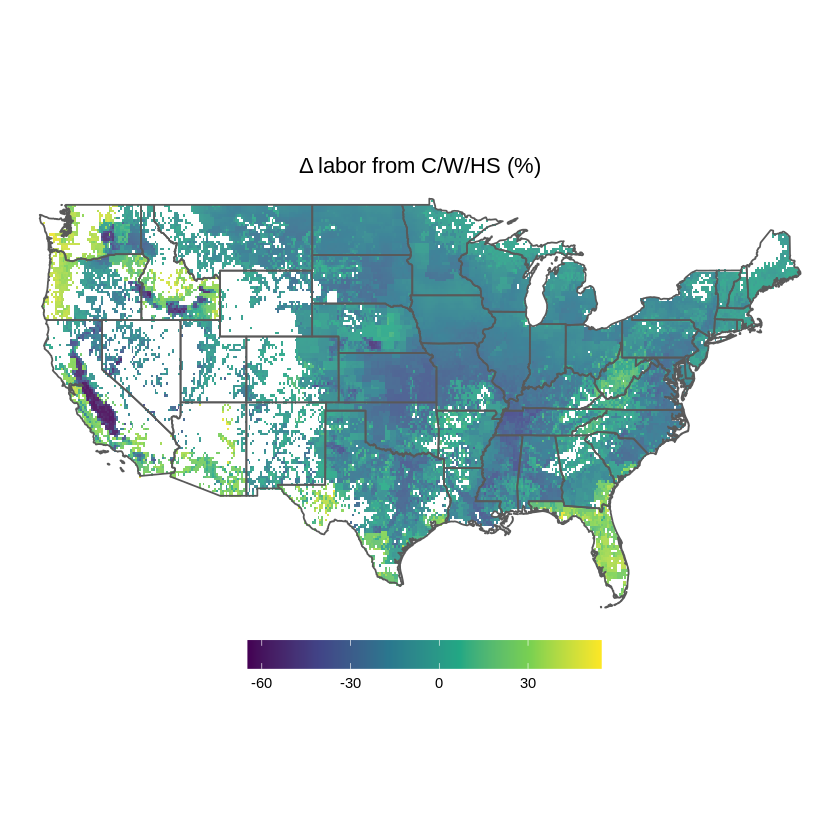

In [117]:
# visualize results - all climate change impacts:
gridded_data_all_labor_raster_plot <- ggplot() +
  geom_tile(data = gridded_data_all_labor_raster_df, aes(x, y, fill = gridded_data_all_labor_raster), alpha = 0.9) +
  geom_sf(data = us_states_shp, linewidth = 0.5, fill = NA) +
  theme_void() +
  scale_x_continuous(limits = c(-124.848974, -66.885444)) +
  scale_y_continuous(limits = c(24.396308, 49.384358)) +
  theme(legend.position = "bottom") +
  labs(title = "Δ labor from C/W/HS (%)", fill = "") +
  scale_fill_viridis_c(na.value = NA) +
  theme(legend.position = "bottom",
        legend.key.width = unit(1.5, "cm"),
        plot.title = element_text(hjust = 0.5))
gridded_data_all_labor_raster_plot

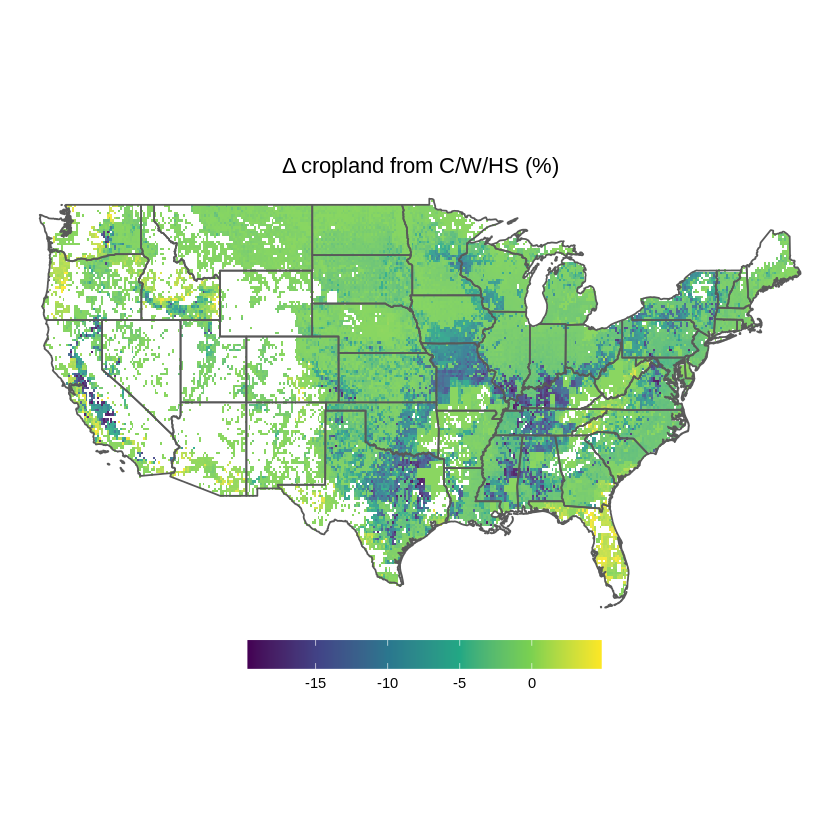

In [118]:
gridded_data_all_land_raster_plot <- ggplot() +
  geom_tile(data = gridded_data_all_land_raster_df, aes(x, y, fill = gridded_data_all_land_raster), alpha = 0.9) +
  geom_sf(data = us_states_shp, linewidth = 0.5, fill = NA) +
  theme_void() +
  scale_x_continuous(limits = c(-124.848974, -66.885444)) +
  scale_y_continuous(limits = c(24.396308, 49.384358)) +
  theme(legend.position = "bottom") +
  labs(title = "Δ cropland from C/W/HS (%)", fill = "") +
  scale_fill_viridis_c(na.value = NA) +
  theme(legend.position = "bottom",
        legend.key.width = unit(1.5, "cm"),
        plot.title = element_text(hjust = 0.5))
gridded_data_all_land_raster_plot

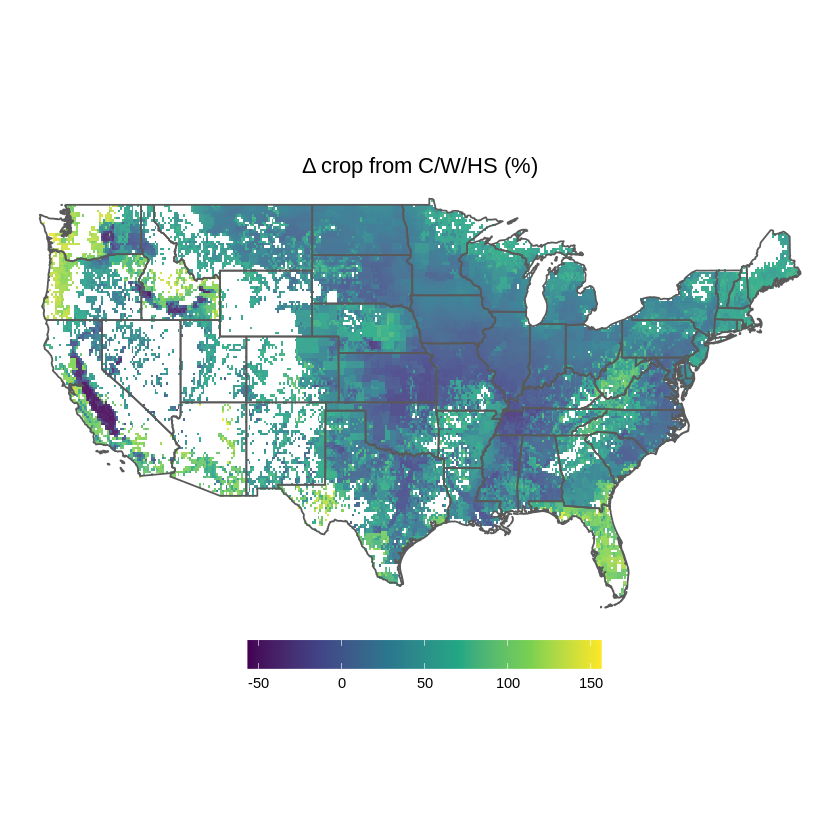

In [120]:
gridded_data_all_crops_raster_plot <- ggplot() +
  geom_tile(data = gridded_data_all_crops_raster_df, aes(x, y, fill = gridded_data_all_crops_raster), alpha = 0.9) +
  geom_sf(data = us_states_shp, linewidth = 0.5, fill = NA) +
  theme_void() +
  scale_x_continuous(limits = c(-124.848974, -66.885444)) +
  scale_y_continuous(limits = c(24.396308, 49.384358)) +
  theme(legend.position = "bottom") +
  labs(title = "Δ crop from C/W/HS (%)", fill = "") +
  scale_fill_viridis_c(na.value = NA) +
  theme(legend.position = "bottom",
        legend.key.width = unit(1.5, "cm"),
        plot.title = element_text(hjust = 0.5))
gridded_data_all_crops_raster_plot

**Figure 9. Response of climate change at grid level (top: labor; middle: land; bottom: crop production)**

Figure 9 visualize the responses of inputs (labor and land) and output (crop) production at grid level, when all three dimensions of climate change are considered. Compared with responses at sub-regional level (figure 4), we find the impact of climate change is not uniform within each sub-regions. This is because (1) the shock of climate change (figure 8) shows obvious heterogeneity on spatial level, and (2) the spatial feature of agricultural productivity and natural endowment across grids. With the grid-resolving model SIMPLE-G, we can capture the heterogeneities from both aspects, and analyze climate change's socio-economic responses at finer resolution.    

While figure 9 shows simulations results from all three dimensions of climate change, we also prepare an interactive map of shocks and additional results at https://zimmermaps.github.io/iguide_simple-g/.

## Ethics

**Introduction**    
We applied our lived experiences and elements from "Driven Data" DEON checklist to our project, to interrogate blindspots, biases, and downstream confluence of these factors.

**A. Data Collection**    
 A.1 Collection bias: Have we considered sources of bias that could be introduced during data collection and survey design and taken steps to mitigate those?  
 A.2 Downstream bias mitigation: Have we considered ways to enable testing downstream results for biased outcomes (e.g., collecting data on protected group status like race or gender)?  

We recognize that our data collection processes and methods have inherent bias as certain sub-regions are not represented in our dataset. Data is extrapolated to make assumptions about the sub-regions with missing data, which while adding rigour to our model, also introduces biases that flow downstream to analysis and interpretation. It is difficult to mitigate these biases, as global datasets are complex, incomplete and aggregated through multiple sources. Which means we are adding layers of data colleciton biases into our model.

In recognzing these shortcomings, we caution those using our model and results to consider the limitations tied to the identified biases.
 
**B. Data Storage**  
 B.1 Data security: Do we have a plan to protect and secure data (e.g., encryption at rest and in transit, access controls on internal users and third parties, access logs, and up-to-date software)?  
 B.2 Data retention plan: Is there a schedule or plan to delete the data after it is no longer needed?  
 
Our data is stored and protected on an institutional server (MyGeoHub at Purdue University) and users have to request for permission to access the data. Data is retained and updated every few years with updates made available for a price, and older versions available for free. The mdoel our data is based on is available for free from the GTAP Center.  

**C. Analysis**  
 C.1 Missing perspectives: Have we sought to address blindspots in the analysis through engagement with relevant stakeholders (e.g., checking assumptions and discussing implications with affected communities and subject matter experts)?  
 C.2 Dataset bias: Have we examined the data for possible sources of bias and taken steps to mitigate or address these biases (e.g., stereotype perpetuation, confirmation bias, imbalanced classes, or omitted confounding variables)?  
 C.3 Honest representation: Are our visualizations, summary statistics, and reports designed to honestly represent the underlying data?
 C.4 Auditability: Is the process of generating the analysis well documented and reproducible if we discover issues in the future?  
 
As we moved into analysis we continue to be cognizant of the downstream effect of our data collection biases. While our analystical framework maps labor flows, it does not deseggrate to be representative of the diveristy of labor in places i.e. variation in ethinicity, gender, and age. We also acknowledge that there multiple agricultural systems - indegenous, modern, local - that are not all necessarily homogenous as represented in our study. That these diverse agricultural systems may indeed respond differently to shocks under different scenarios in real time.

We validated our results through multiple checks and persons to ensure that visualizations, statistics and reporting are truly representative of our underlying model. We have documented our process in the Jupyter notebook for both auditability and reproducibility to the extent possible.


**D. Modeling**  
 D.1 Proxy discrimination: Have we ensured that the model does not rely on variables or proxies for variables that are unfairly discriminatory?  
 D.2 Metric selection: Have we considered the effects of optimizing for our defined metrics and considered additional metrics?  
 D.3 Explainability: Can we explain in understandable terms a decision the model made in cases where a justification is needed?  
 D.4 Communicate bias: Have we communicated the shortcomings, limitations, and biases of the model to relevant stakeholders in ways that can be generally understood?  
 
We ran multiple scenarios and selected the models that best explain our research question, while controlling for other extraneoues factors. We ran multiple models to also understand if better metrics were available to explore the effect of heat stress on labor mobility and to reduce proxy discrimination - if all our models give us similar results in the same direction, we can assume minimal or inconsequential effect of proxy discrimnation and other biases.

 
**E. Deployment**  
 E.1 Monitoring and evaluation: How are we planning to monitor the model and its impacts after it is deployed (e.g., performance monitoring, regular audit of sample predictions, human review of high-stakes decisions, reviewing downstream impacts of errors or low-confidence decisions, testing for concept drift)?  
 E.2 Redress: Have we discussed with our organization a plan for response if users are harmed by the results (e.g., how does the data science team evaluate these cases and update analysis and models to prevent future harm)?  
 E.3 Roll back: Is there a way to turn off or roll back the model in production if necessary?  
 E.4 Unintended use: Have we taken steps to identify and prevent unintended uses and abuse of the model and do we have a plan to monitor these once the model is deployed?  
 
We recognize that the deployment of our model and study may have wider and unintended consequences on people through policy. Unintended use: We considered that in mapping future labor flows due to impact of heat stress and other climate related vagaries, that labor recieving regions could preemptively introduce policies that hinders labor flows.

We would extend to end users of our research to connect with us before interpreting the results of our work for very localized policy action. While the results should be generalizable across regions, local specificities will determine how labor mobility will actually play out. For example, because California has a number of farmworker protection laws that do include some heat measures, in reality labor may not flow out of California at the rate we predict, vs other places like Georgia and Florida that have limited or no farmworker protections. In the absence of Federal law, the effect of labor mobility due to heat stress may very well be different based on local laws and protections.

Extending scope in future studies would look into incorporating seasonality and changes in temperature in the model in order to explain how labor mobility might change during the summer vs winter season. Another area is to look into the impact of heat stress on the health of the farm workers.


# Future Directions

After we simulate the impact of heat stress for the continental United States except for Alaska, in the next step we plan to separate the impact of heat stress on California. Equivalent to the fourth largest economy globally, California plays a very important role in the US's agriculture. It is the largest agricultural producer in the United States and producees over three-quarters of the fruits and nuts and one-third of the vegetables grown, according to the California Department of Food and Agriculture.  

By separating the impact of heat stress on California, we can evaluate the local impact on agriculture and discuss potential adapation plans to be implemented. Furthermore, we can also research the spillover effects from heat stress on California to other states in the US through the market linkage, including potential impacts on labor migration. 


## References

* Baldos, Uris Lantz C., et al. "SIMPLE-G: A multiscale framework for integration of economic and biophysical
determinants of sustainability." Environmental Modelling & Software 133 (2020): 104805.
* El Khayat M, Halwani DA, Hneiny L, Alameddine I, Haidar MA, Habib RR. Impacts of Climate Change and Heat Stress on Farmworkers' Health: A Scoping Review. Front Public Health. 2022 Feb 8;10:782811. doi: 10.3389/fpubh.2022.782811. PMID: 35211437; PMCID: PMC8861180. 
* Haqiqi, Iman. Irrigation, adaptation, and water scarcity. Diss. Purdue University (2019).
* Haqiqi, Iman, et al. "Global drivers of local water stresses and global responses to local water policies in the United
States." Environmental Research Letters 18.6 (2023): 065007
* Haqiqi, Iman, et al. "Local, regional, and global adaptations to a compound pandemic-weather stress event."
Environmental Research Letters 18.3 (2023): 035005.
* Hertel, Thomas W. "The global supply and demand for agricultural land in 2050: A perfect storm in the making?."
American journal of agricultural Economics 93.2 (2011): 259-275.
* Hertel, Thomas W., and Uris Lantz C. Baldos. "Attaining food and environmental security in an era of globalization."Global environmental change 41 (2016): 195-205.
* Liu, Jing, et al. "Achieving sustainable irrigation water withdrawals: global impacts on food security and land use."
Environmental Research Letters 12.10 (2017): 104009.
* Ray, Srabashi, et al. "Labor markets: A critical link between global-local shocks and their impact on agriculture."
Environmental Research Letters 18.3 (2023): 035007.
* Saeed, W., et al. "The poverty impacts of labor heat stress in West Africa under a warming climate." Earth's Future, 10 (2022): e2022EF002777. 



## Appendices and Supplemental Materials

### Validation of SIMPLE-G


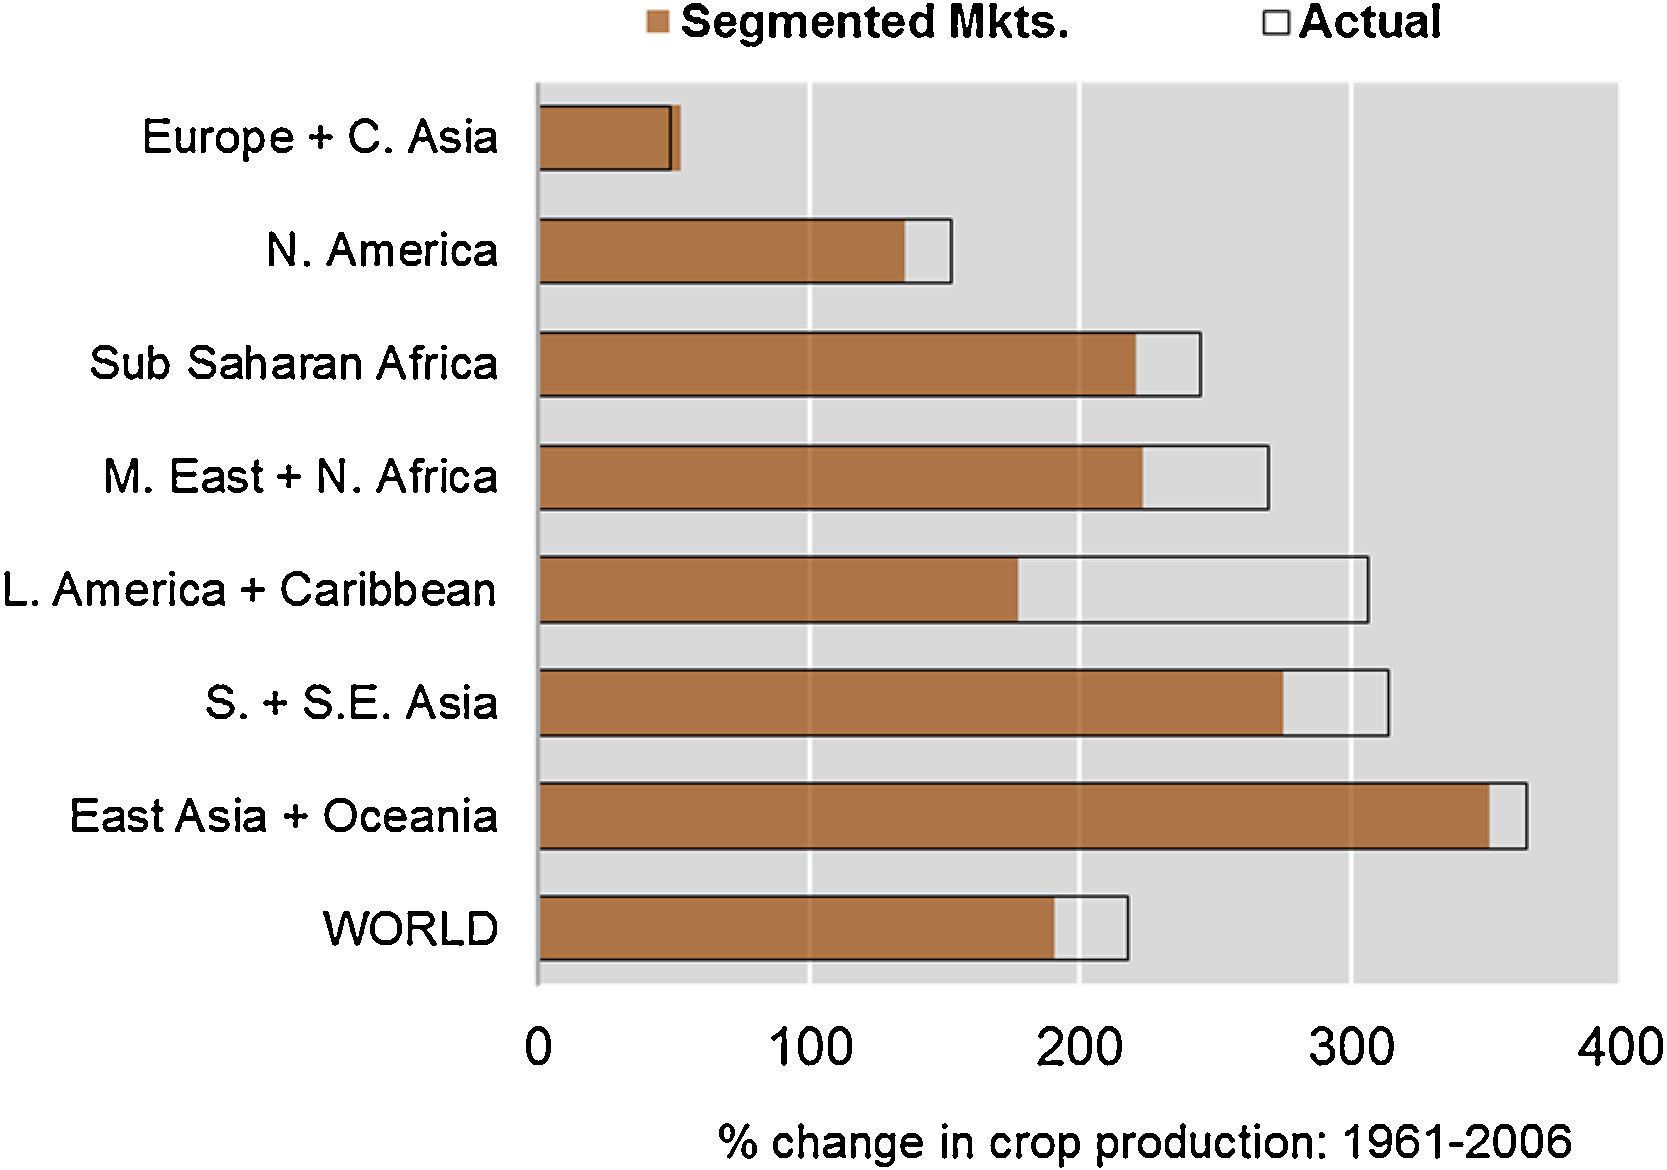

Validation at regional level  

Observed data: FAOSTAT
Simulated data: Cropland from SIMPLE with socio-economic drivers
Time span: 1961 - 2006

Source:
Hertel, Thomas W., and Uris Lantz C. Baldos. "Attaining food and environmental security in an era of globalization." Global environmental change 41 (2016): 195-205. https://doi.org/10.1016/j.gloenvcha.2016.10.006


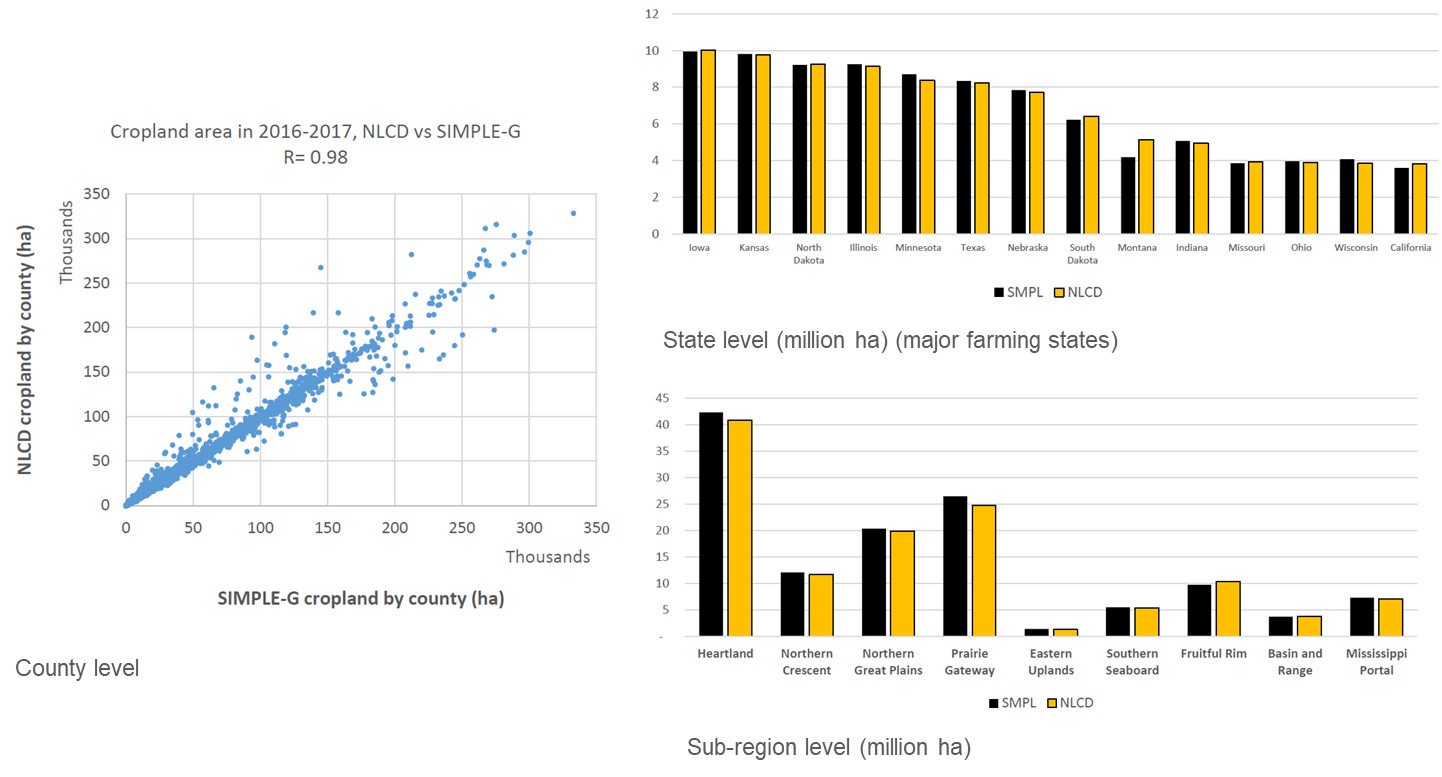

Validation at grid level  

Observed data: Cropland from National Land Cover Database (NLCD), USDA  
Simulated data: Cropland from SIMPLE-G with socio-economic drivers  
Time span: from 2001/2002 to 2016/2017  

Source: Supplementary materials of Haqiqi, Iman, et al. "Global drivers of local water stresses and global responses to local water policies in the United States." Environmental Research Letters 18.6 (2023): 065007. doi.org/10.1088/1748-9326/acd269


### Daily Progress Updates

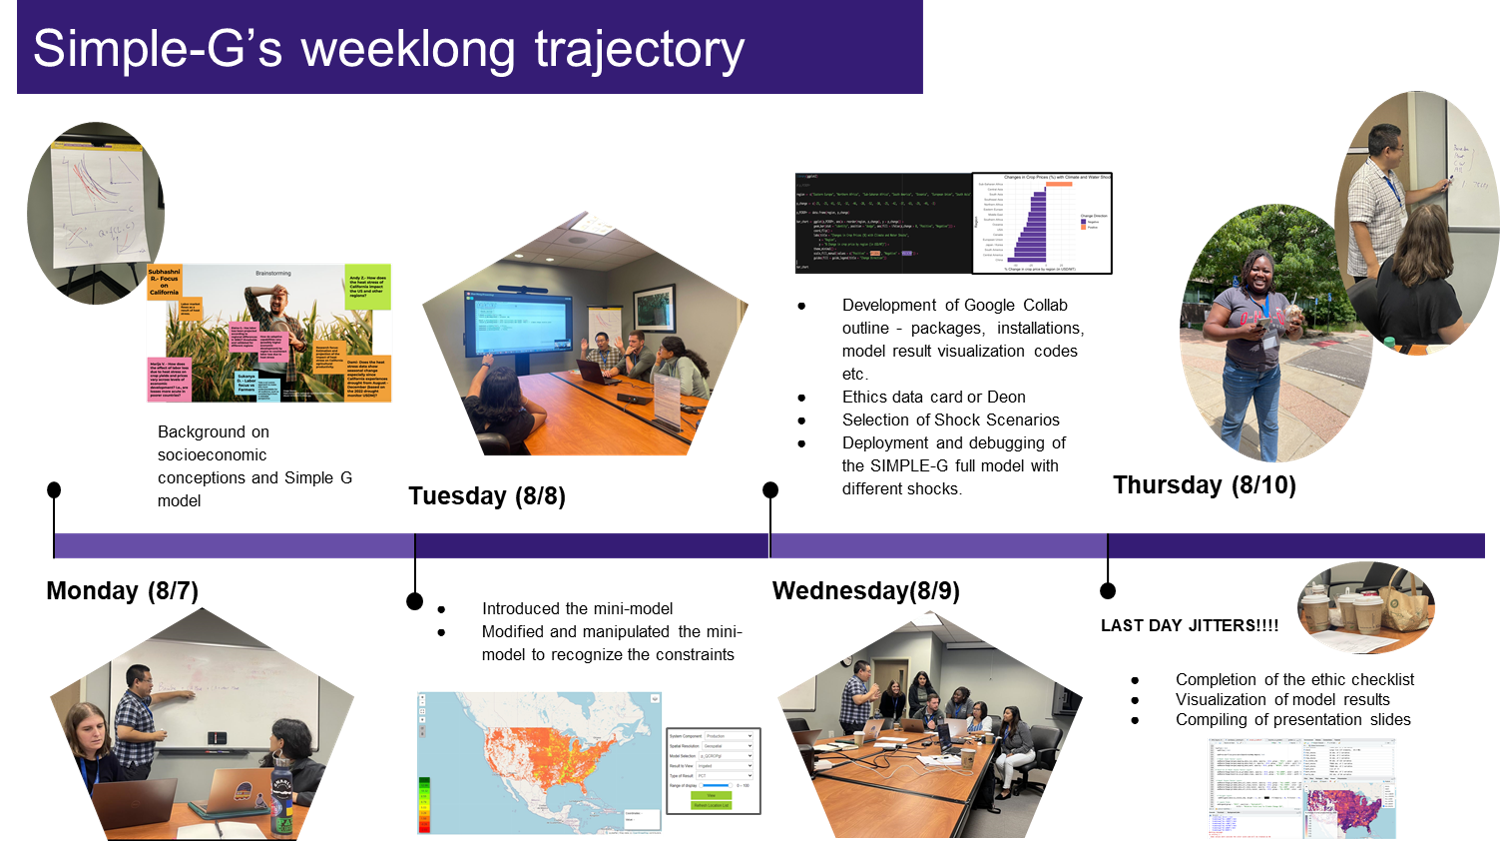